In [1]:
#Load the libraries necessary to run the code
import os
import cv2
import glob
import torch
import datetime
import numpy as np
from PIL import Image
import glob
import torch.nn as nn
import albumentations as A
from torch import from_numpy
import torch.nn.functional as F
from torch.nn import DataParallel
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from torch.nn import CrossEntropyLoss
from torch.optim import SGD, Adam, lr_scheduler
from torch.utils.data import Dataset, DataLoader

In [2]:
#Parameters

INPUT_IMG_SIZE = 256

OUTPUT_CLASSES = 12

LEARINING_RATE = 0.01

OPIMIZER_NAME = 'Adam'
    
SCHEDULER_NAME = 'stepLR'

BATCH_SIZE = 8

MAX_EPOCHS = 10

AUGMENTATION = False 

# MEAN = (0.485, 0.456, 0.406)

# STD = (0.229, 0.224, 0.225)

# MEAN = (0.5,0.5,0.5) 

# STD = (0.5,0.5,0.5) 

MEAN = None

STD = None 

THRESH_ACC_CKP = 0.9

SCHEDULER_STEP_SIZE = 4

USE_CUDA = torch.cuda.is_available()

In [ ]:
# This pulls the images from the path you set. It will need to be changed based on your own computers file locations.
# You need to place all images in a singular folder for this to work. It will not look inside other folders, all the image
# files need to be available, no sub-folders.

train_images = glob.glob(r'C:\Users\Christian\Desktop\Classes\Advance Machine Learning\Project\DataSets\Real_Images\test\Test_Data/*.png')
test_images = glob.glob(r'C:\Users\Christian\Desktop\Classes\Advance Machine Learning\Project\DataSets\Real_Images\train\Test_Images/*.png')

In [ ]:
train_images

In [3]:
# Used for testing on a small group of photos.

small_test_images = glob.glob(r'C:\Users\Christian\Desktop\Classes\Advance Machine Learning\Project\DataSets\Real_Images\test\Small_Test/*.png')

In [4]:
# Sets the train and test lists.

# train_files = train_images
# test_files = test_images

train_files = small_test_images
test_files = small_test_images

print('Total train images:', len(train_files)) 
print('Total test images:', len(test_files))

Total train images: 12
Total test images: 12


In [5]:
# Mask Encoding

kmeans_data = []
for i in train_files[:50]:
    org_img = cv2.imread(i)
    #img = org_img[:, 0:INPUT_IMG_SIZE,:]
    msk = org_img[:, INPUT_IMG_SIZE:,:]
    kmeans_data.append(msk)
kmeans_data = np.array(kmeans_data)
kmeans_data = kmeans_data.reshape(-1,3)
print(kmeans_data.shape)

(22020096, 3)


In [6]:
# train kmeans with 12 clusters

encoder = KMeans(n_clusters=OUTPUT_CLASSES)
encoder.fit(kmeans_data)

KMeans(n_clusters=12)

In [17]:
colors = {0: [192,255,62], 
          1: [192,255,62],
          2: [192,255,62],
          3: [192,255,62],
          4: [192,255,62],
          5: [192,255,62],
          6: [192,255,62],
          7: [192,255,62],
          8: [192,255,62],
          9: [192,255,62],
          10: [192,255,62],
          11: [192,255,62]
          }

No of classes in encoded mask: [ 0  1  2  3  4  5  6  7  8  9 10 11]


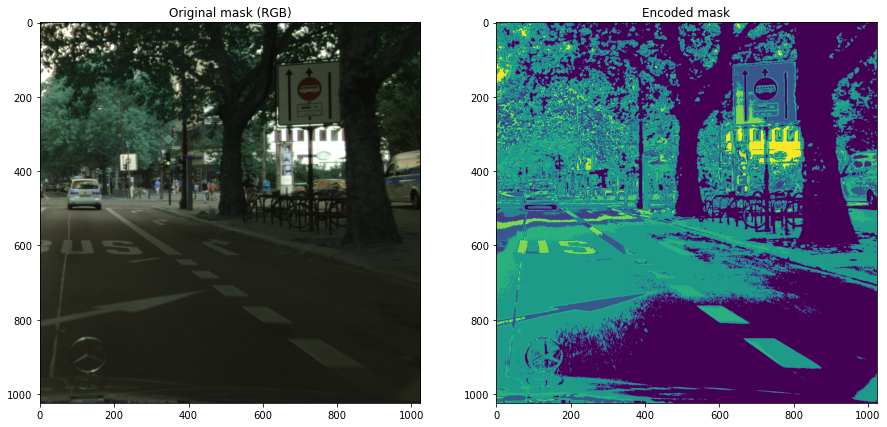

No of classes in encoded mask: [ 0  1  2  3  4  5  6  7  8  9 10 11]


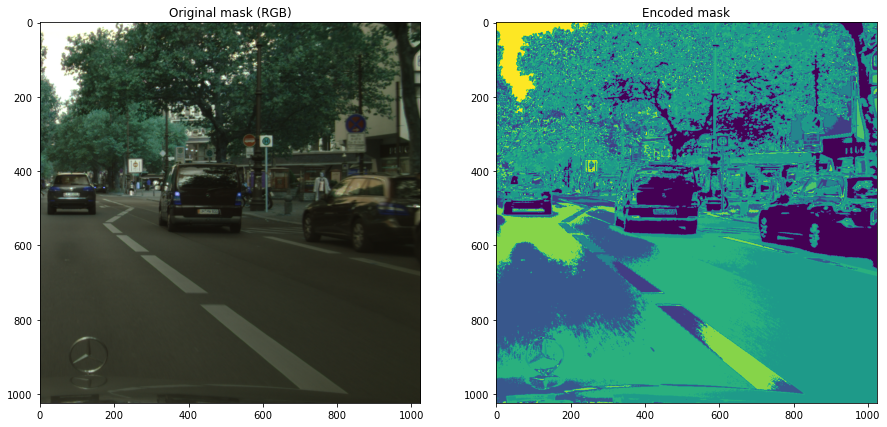

No of classes in encoded mask: [ 0  1  2  3  4  5  6  7  8  9 10 11]


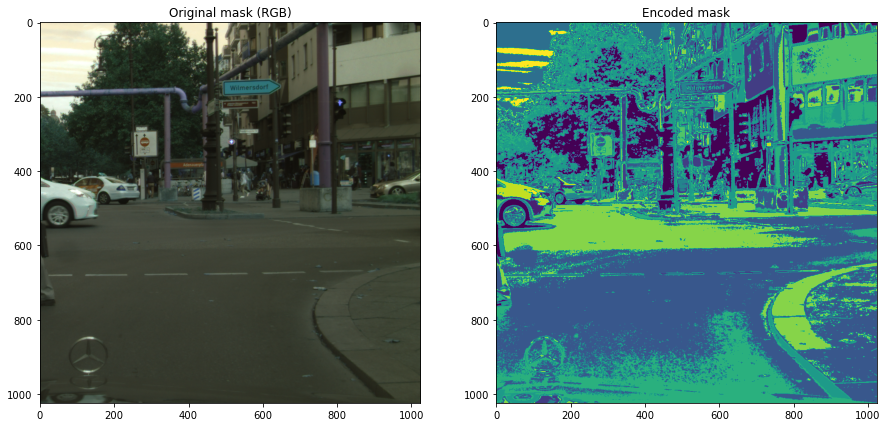

In [16]:
# encoding with trained kmeans

for i in train_files[:3]:
    org_img = cv2.imread(i)
    #img = org_img[:, 0:256,:]
    msk = org_img[:, 1024:,:]      #shape (256,256,3)
    test = msk.reshape(-1,3)      #shape (65536,3)
    pred = encoder.predict(test)  #shape (65536)
    
    enc_pred = pred.reshape(1024,1024)  #shape (256,256)
    
    pred = np.array([colors[p] for p in pred]).reshape(1024,1024,3)
    
    print('No of classes in encoded mask:',np.unique(enc_pred))
    
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
    plt.imshow(msk)
    plt.title('Original mask (RGB)')
    plt.subplot(1,2,2)
    plt.imshow(enc_pred)
    plt.title('Encoded mask')
    plt.show()